In [132]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.linear_model import LinearRegression



color_pal = sns.color_palette()

# Loading and late data transforamtion

In [133]:
# transforms the prportion using logarithm in ordere to make predictions easier
def LogarithmProportion(row, column_name):
    p = row[column_name]
    return np.log(p/(1-p))

In [134]:

df = pd.read_csv(r".\data\merged_PAS_Crine.csv")
df['Proportion'] = df.apply(lambda row: LogarithmProportion(row, "Proportion"), axis=1)
df = df.drop(columns=["Date"])



In [135]:
df.head()

,Anti-social behaviour,Other crime,Burglary,Vehicle crime,Robbery,Other theft,Criminal damage and arson,Drugs,Shoplifting,Violence and sexual offences,Theft from the person,Public order,Bicycle theft,Possession of weapons,Proportion
0,18327,685,5375,6569,1766,8457.0,5078.0,2591.0,3679.0,13536.0,3013.0,3302.0,1407.0,283.0,1.815290
1,19630,706,5524,6993,1882,9245.0,5348.0,2658.0,3627.0,15058.0,3200.0,3504.0,1663.0,285.0,1.900959
2,21392,734,5245,7261,1707,9383.0,5260.0,2780.0,3515.0,16562.0,2686.0,3720.0,1696.0,318.0,1.900959
3,23311,757,5368,6630,1764,9821.0,5405.0,2922.0,3430.0,17432.0,2650.0,3793.0,1762.0,316.0,1.992430
4,21826,683,5343,6454,1771,8927.0,4935.0,2961.0,3422.0,16176.0,2366.0,3561.0,1475.0,329.0,1.992430


# Train/Test Split 

In [136]:
# first we focus only on the non-transformed data:

# input
X_simple = df[df.columns[0:-1]]
Y_simple = df['Proportion']

# model 
X_simple = sm.add_constant(X_simple)

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, Y_simple, test_size = 0.2, random_state=33, shuffle=True)



## For parameter tunning validation set will be also used, as there is so liitle data Leave-one-out cross-validation will be used, but before that let's check the data

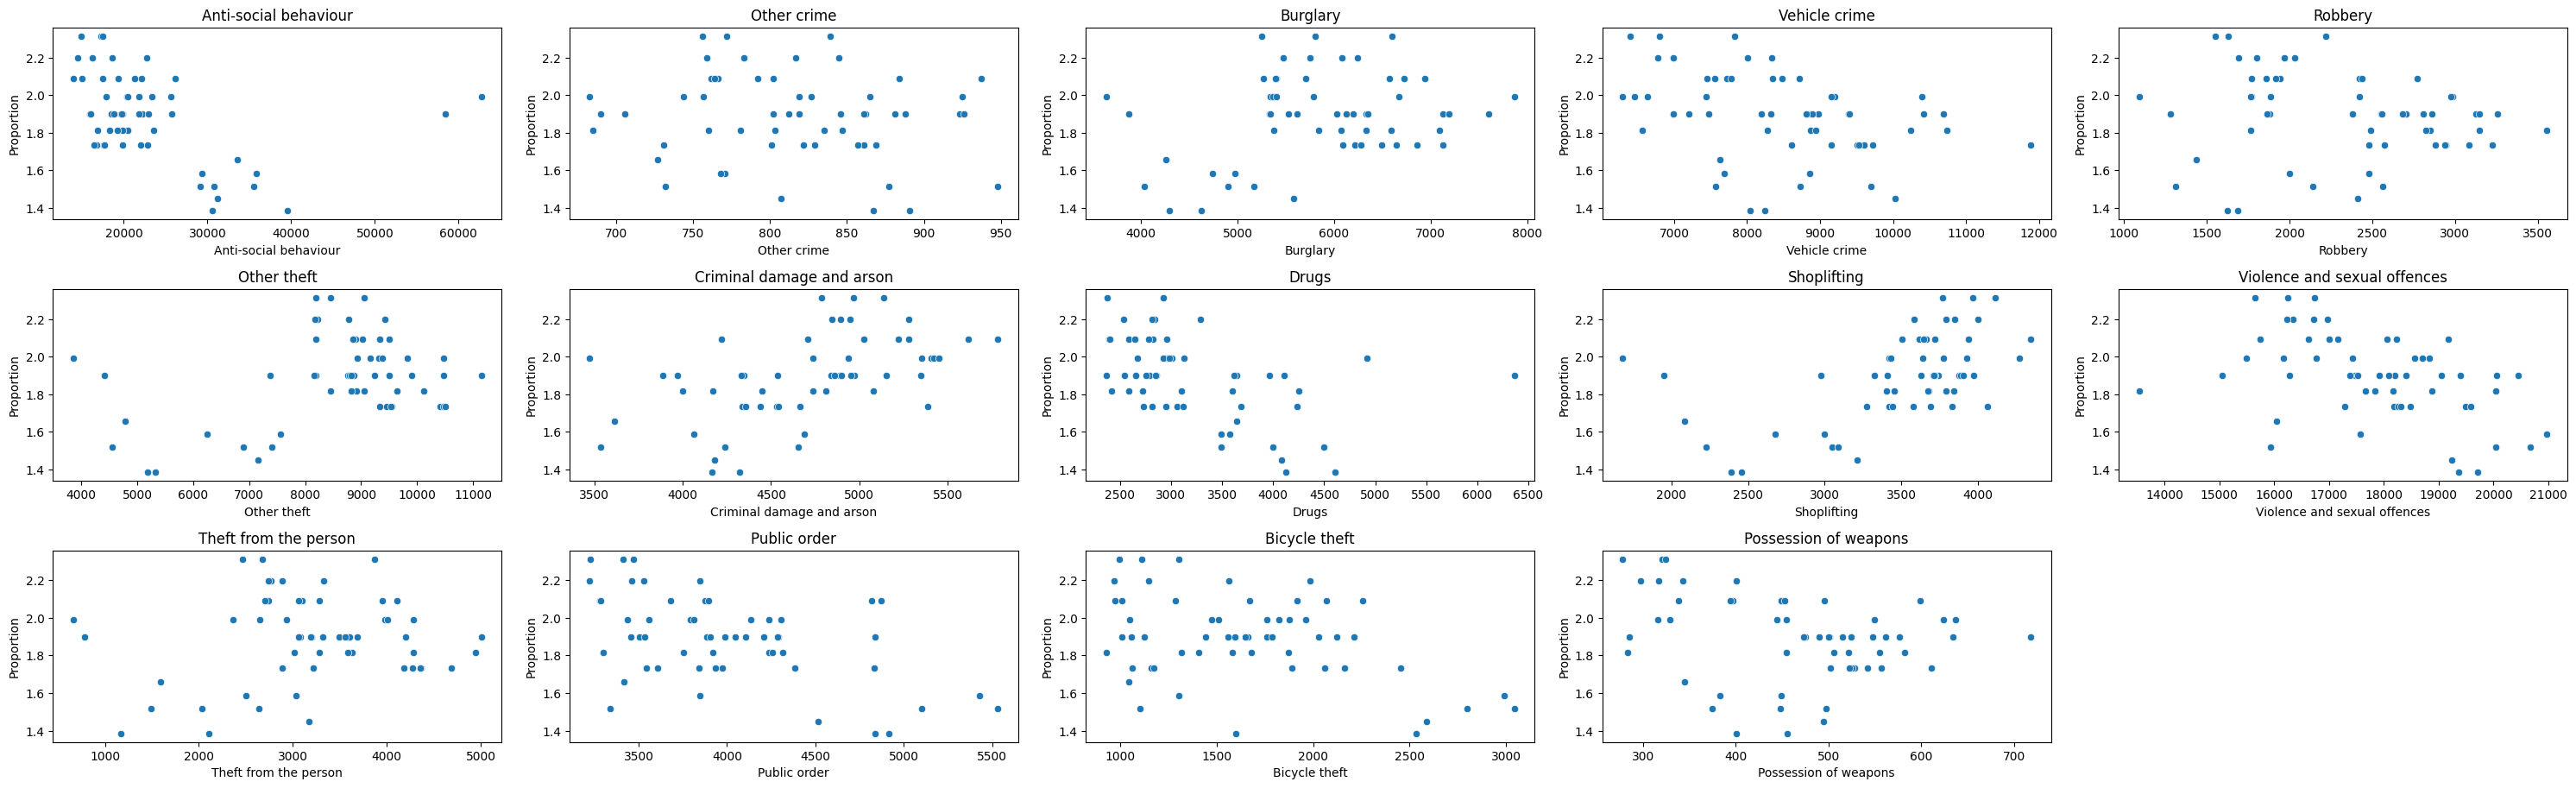

In [137]:
columns_to_plot = X_train_simple.columns[1:]

fig, axs = plt.subplots(10, 5, figsize=(30, 30))

# Flatten the 2D array of axes to easily iterate over them
axs = axs.flatten()

# Iterate over the columns and plot
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(data=X_train_simple, x=col, y=y_train_simple, ax=axs[i])
    axs[i].set_title(col)

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Observations: 

- Anti-social behaviour, vehicle crime, public order, drugs, viloance and sexual offences have rather negative liner relationship with the transformed trust proportion 
- some variables such as shoplifting, theft from the person, criminal damage and arson, burglary, seem to have positive correlation
- might be beneficial to perform transformations on the variables to enhance the correlation 
- multicolinearity might be an issue

Furhter more the ditribution of the independent varaibles will be checked.

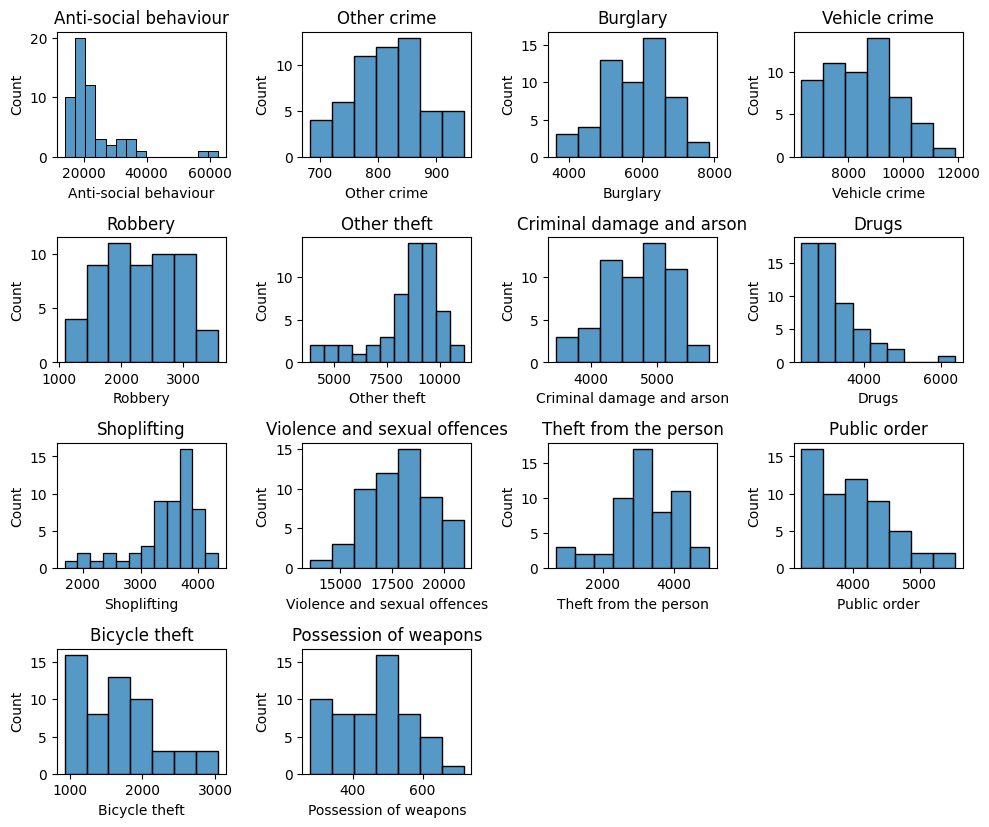

In [138]:
columns_to_plot = X_train_simple.columns[1:]

fig, axs = plt.subplots(5, 4, figsize=(10, 10))

# Flatten the 2D array of axes to easily iterate over them
axs = axs.flatten()

# Iterate over the columns and plot
for i, col in enumerate(columns_to_plot):
    sns.histplot(data=X_train_simple, x=col, ax=axs[i])
    axs[i].set_title(col)

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


# Observations:

### Right skewed variables: use log transfromation

- Anti-social behaviour
- bicycle theft
- public order

### Left skwed varaibles: use squre root transformation

- shoplifting
- other theft
-  Theft from the person 



In [139]:
# transformation of right skewed data
X_train_simple['log_Anti-social behaviour'] = X_train_simple['Anti-social behaviour'].apply(lambda x: np.log(x))
X_train_simple['log_Bicycle theft'] = X_train_simple['Bicycle theft'].apply(lambda x: np.log(x))
X_train_simple['log_Public order'] = X_train_simple['Public order'].apply(lambda x: np.log(x))

# transformation of left skewed data
X_train_simple['sqrt_Shoplifting'] = X_train_simple['Shoplifting'].apply(lambda x: np.sqrt(x))
X_train_simple['sqrt_Other theft'] = X_train_simple['Other theft'].apply(lambda x: np.sqrt(x))
X_train_simple['sqrt_Theft from the person'] = X_train_simple['Theft from the person'].apply(lambda x: np.sqrt(x))


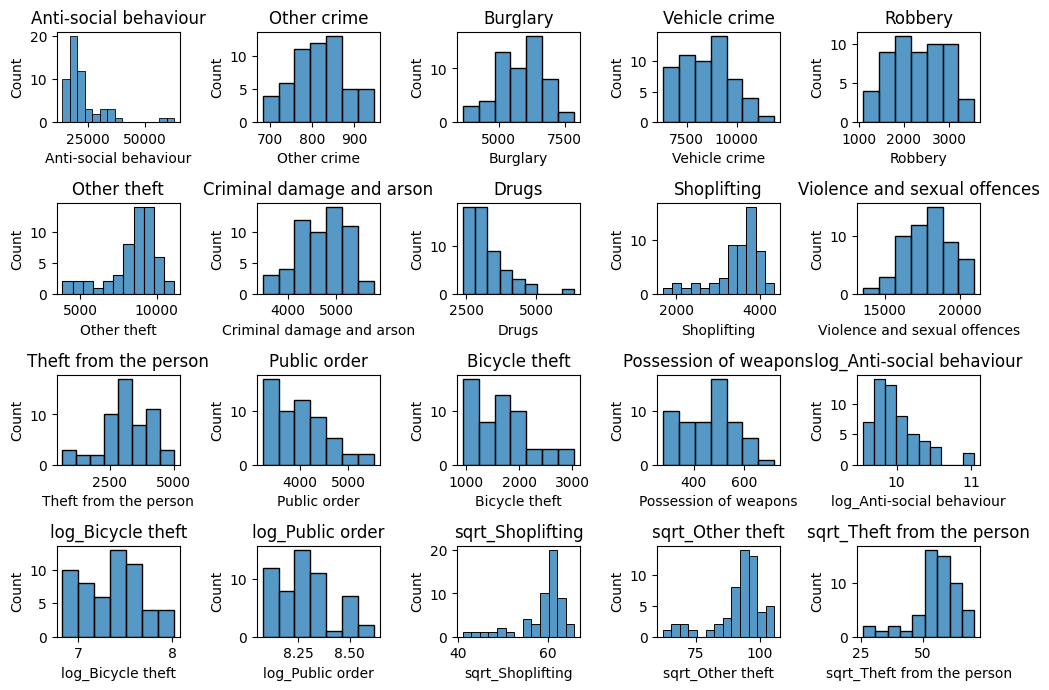

In [140]:
columns_to_plot = X_train_simple.columns[1:]



fig, axs = plt.subplots(6, 5, figsize=(10, 10))

# Flatten the 2D array of axes to easily iterate over them
axs = axs.flatten()

# Iterate over the columns and plot
for i, col in enumerate(columns_to_plot):
    sns.histplot(data=X_train_simple, x=col, ax=axs[i])
    axs[i].set_title(col)

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Observations: 
- the logarithmic and squre transformation do not seem to make a big differnce in overall distribution, the best effect can be ssen in Anti social behaviour

Let's check also th linealirity of these new variables


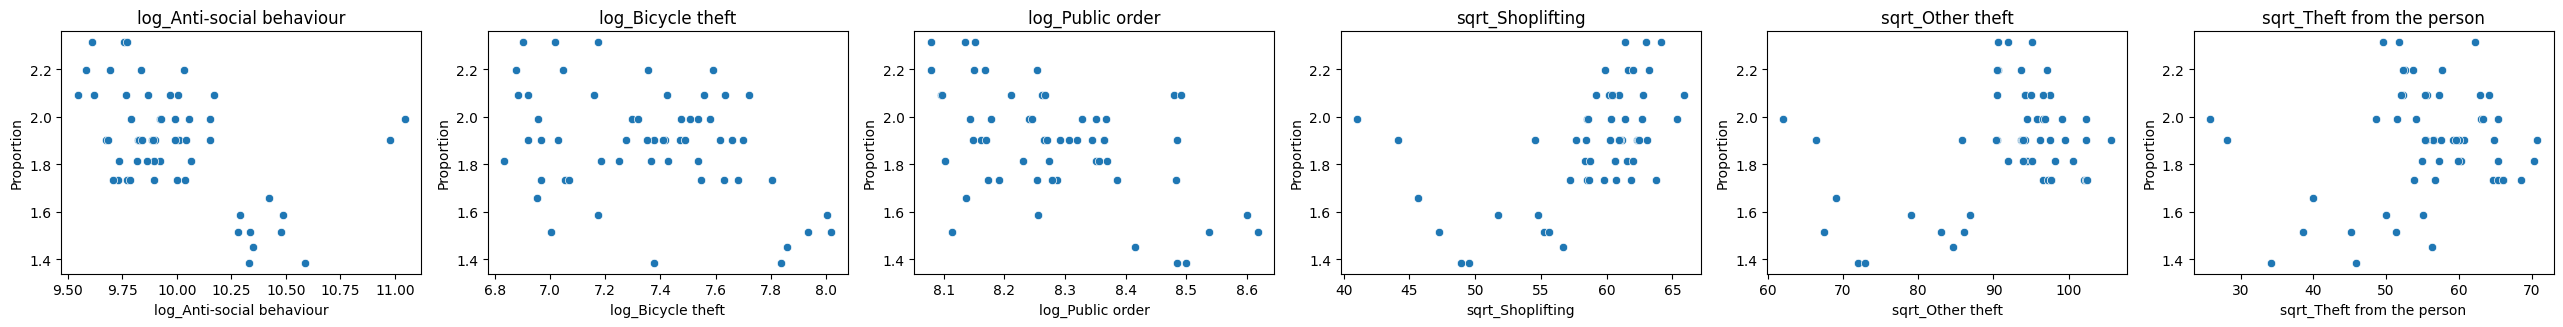

In [141]:
columns_to_plot = X_train_simple.columns[15:]

fig, axs = plt.subplots(10, 7, figsize=(30, 30))

# Flatten the 2D array of axes to easily iterate over them
axs = axs.flatten()

# Iterate over the columns and plot
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(data=X_train_simple, x=col, y=y_train_simple, ax=axs[i])
    axs[i].set_title(col)

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Observation:

- The linear relation did not change form the first view, let's check the correlation score

In [142]:
df_corr = X_train_simple.copy()
df_corr["Proportion"] = y_train_simple
df_corr = df_corr.drop(columns=['const'])
the_corr = df_corr.corr()

the_corr['Proportion'].sort_values(ascending=False)

Proportion                      1.000000
Shoplifting                     0.538519
Criminal damage and arson       0.517691
sqrt_Shoplifting                0.515706
sqrt_Other theft                0.369445
Other theft                     0.363905
Burglary                        0.271059
sqrt_Theft from the person      0.166525
Theft from the person           0.149773
Other crime                    -0.131767
Robbery                        -0.149913
Possession of weapons          -0.263329
log_Bicycle theft              -0.366482
Vehicle crime                  -0.373856
Anti-social behaviour          -0.382151
Bicycle theft                  -0.409498
Drugs                          -0.467530
Violence and sexual offences   -0.469444
log_Anti-social behaviour      -0.483362
log_Public order               -0.510573
Public order                   -0.514253
Name: Proportion, dtype: float64

In [143]:
the_corr

,Anti-social behaviour,Other crime,Burglary,Vehicle crime,Robbery,Other theft,Criminal damage and arson,Drugs,Shoplifting,Violence and sexual offences,...,Public order,Bicycle theft,Possession of weapons,log_Anti-social behaviour,log_Bicycle theft,log_Public order,sqrt_Shoplifting,sqrt_Other theft,sqrt_Theft from the person,Proportion
Anti-social behaviour,1.000000,-0.012647,-0.741725,-0.244832,-0.453277,-0.744104,-0.470814,0.781056,-0.790164,0.131569,...,0.350478,0.296130,-0.022998,0.971811,0.270175,0.340197,-0.810683,-0.768349,-0.767844,-0.382151
Other crime,-0.012647,1.000000,0.218634,0.464932,0.333755,0.211519,0.195876,0.084192,0.253186,0.662164,...,0.542095,0.422576,0.543157,0.036740,0.434594,0.564559,0.246552,0.207494,0.168345,-0.131767
Burglary,-0.741725,0.218634,1.000000,0.603253,0.763948,0.816903,0.302300,-0.471190,0.652830,0.162090,...,-0.176785,-0.208482,0.403274,-0.770992,-0.190885,-0.157137,0.668007,0.814024,0.843764,0.271059
Vehicle crime,-0.244832,0.464932,0.603253,1.000000,0.836340,0.409126,-0.162560,0.047219,0.179015,0.586519,...,0.311994,0.182418,0.702060,-0.206206,0.163622,0.338065,0.197335,0.398394,0.595296,-0.373856
Robbery,-0.453277,0.333755,0.763948,0.836340,1.000000,0.650012,0.002439,-0.149187,0.393824,0.536148,...,0.254930,0.119445,0.673375,-0.418980,0.119318,0.279778,0.417838,0.646776,0.824739,-0.149913
Other theft,-0.744104,0.211519,0.816903,0.409126,0.650012,1.000000,0.605141,-0.584218,0.818340,0.161120,...,-0.042206,0.009035,0.292033,-0.713910,0.062020,-0.014772,0.832687,0.997655,0.852485,0.363905
Criminal damage and arson,-0.470814,0.195876,0.302300,-0.162560,0.002439,0.605141,1.000000,-0.640312,0.783697,-0.029840,...,0.045273,0.185432,-0.039442,-0.425358,0.243225,0.053750,0.775310,0.621895,0.377789,0.517691
Drugs,0.781056,0.084192,-0.471190,0.047219,-0.149187,-0.584218,-0.640312,1.000000,-0.723676,0.258925,...,0.346836,0.141996,0.095601,0.756142,0.121502,0.343753,-0.729109,-0.609703,-0.529513,-0.467530
Shoplifting,-0.790164,0.253186,0.652830,0.179015,0.393824,0.818340,0.783697,-0.723676,1.000000,0.005348,...,-0.093598,0.007670,0.148212,-0.761884,0.059956,-0.075117,0.998146,0.841304,0.711588,0.538519
Violence and sexual offences,0.131569,0.662164,0.162090,0.586519,0.536148,0.161120,-0.029840,0.258925,0.005348,1.000000,...,0.849735,0.622081,0.626250,0.223712,0.601198,0.861773,0.021715,0.158490,0.234533,-0.469444


# Observations: 
- Anti_social behaviour, Theft from the persn benefit from transformation
- Shoplifting, Public order, Bicycle theft does not benefit from transformation
- most correlated elements are:
    - Shoplifting: 0.538519
    - Criminal damge and Arson:  0.517691
    - Public order: -0.514253
    - log_Anti_social behaviour: -0.483362
    - Violence and sexual offences: -0.469444
    - Drugs: -0.467530
    - Bicycle Theft: -0.409498
    - Vehicle crime: -0.373856
    - Other theft:  0.363905

# Model ideas:

As the independent variables above mentioned 9 variables will be used for the prediction, as all of them are quite correlated with the y variable, and follow more less linear distribution with respect to the y attribute. Pearson correlation will be used to check for linearity.

In [144]:
# getting the pearson correlation for every variable

predictors = ['Shoplifting', 'Criminal damage and arson', 'Public order', 'log_Anti-social behaviour', 'Violence and sexual offences',
              'Drugs', 'Vehicle crime', 'Other theft']

correlations = {}

for column in predictors:
    x = X_train_simple[column]
    y = y_train_simple
    r, p_value = pearsonr(x, y)
    correlations[column] = (r, p_value)

variables = []
for key, value in correlations.items():
    if value[1] < 0.05:
        variables.append((key, value[0], value[1]))
        print(f'{key}: P. corr: {value[0]:04f}, p_val = {value[1]:04f} ')

Shoplifting: P. corr: 0.538519, p_val = 0.000019 
Criminal damage and arson: P. corr: 0.517691, p_val = 0.000044 
Public order: P. corr: -0.514253, p_val = 0.000050 
log_Anti-social behaviour: P. corr: -0.483362, p_val = 0.000161 
Violence and sexual offences: P. corr: -0.469444, p_val = 0.000262 
Drugs: P. corr: -0.467530, p_val = 0.000280 
Vehicle crime: P. corr: -0.373856, p_val = 0.004536 
Other theft: P. corr: 0.363905, p_val = 0.005833 


# Observations: 
- For every choosen varibale we could reject H0 that is no linear relationship between the variables

### Preparation for k-fold and check for multicolinearity:

- we will create 50 models using only 4 predictors out of 9:
- the reason why only 5 predictors will be used as we have 54 rows in training set we follow a guidline of rule of 10. where there sould be at least 10 times the rows whane compared to number of predictors. As hyperparameter tunning will be used, the training will set will get smaller by additional 10 rows, leaving us with around 40 rows of trainng data.

# Checking for multicolinearity: 

In [145]:
X_train_simple.columns[1:15]

Index(['Anti-social behaviour', 'Other crime', 'Burglary', 'Vehicle crime',
       'Robbery', 'Other theft', 'Criminal damage and arson', 'Drugs',
       'Shoplifting', 'Violence and sexual offences', 'Theft from the person',
       'Public order', 'Bicycle theft', 'Possession of weapons'],
      dtype='object')

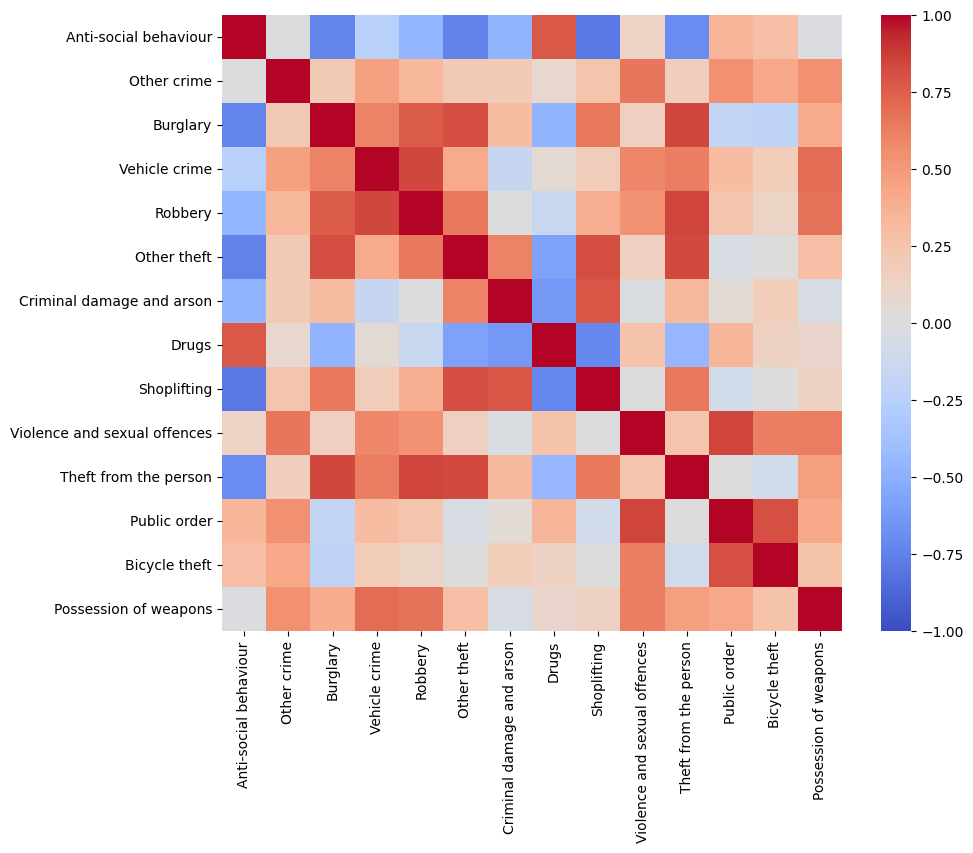

In [146]:
### changing approach
experiment = X_train_simple.columns[1:15] #y_train_simple
df_experiment = X_train_simple[experiment]

plt.figure(figsize=(10,8))
sns.heatmap(df_experiment.corr(), cmap='coolwarm', vmin=-1, vmax=1);

In [147]:
def correlated_feature_pairs(dataset, treshhold):
    correlated_pairs = []
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > treshhold:
                feature1 = corr_matrix.columns[i]
                feature2 = corr_matrix.columns[j]
                correlated_pairs.append((feature1, feature2))

    return correlated_pairs


corr_tresh = 0.8

correlated_pairs = correlated_feature_pairs(df_experiment, corr_tresh)

print("Total", len(correlated_pairs), "were found")

for pair in correlated_pairs:
    print(f'Correlated Pair: {pair[0]} and {pair[1]}')

Total 8 were found
Correlated Pair: Robbery and Vehicle crime
Correlated Pair: Other theft and Burglary
Correlated Pair: Shoplifting and Other theft
Correlated Pair: Theft from the person and Burglary
Correlated Pair: Theft from the person and Robbery
Correlated Pair: Theft from the person and Other theft
Correlated Pair: Public order and Violence and sexual offences
Correlated Pair: Bicycle theft and Public order


In [148]:
def correlation_detection(dataset, treshhold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > treshhold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr
    

In [149]:
df_experiment_1 = df_experiment.copy()

In [150]:
correlated_features = correlation_detection(df_experiment_1, 0.8)

In [151]:
correlated_features

{'Bicycle theft',
 'Other theft',
 'Public order',
 'Robbery',
 'Shoplifting',
 'Theft from the person'}

In [152]:
df_experiment_1.drop(correlated_features, axis=1, inplace=True)

In [153]:
df_experiment_1.shape # dropped variables

(56, 8)

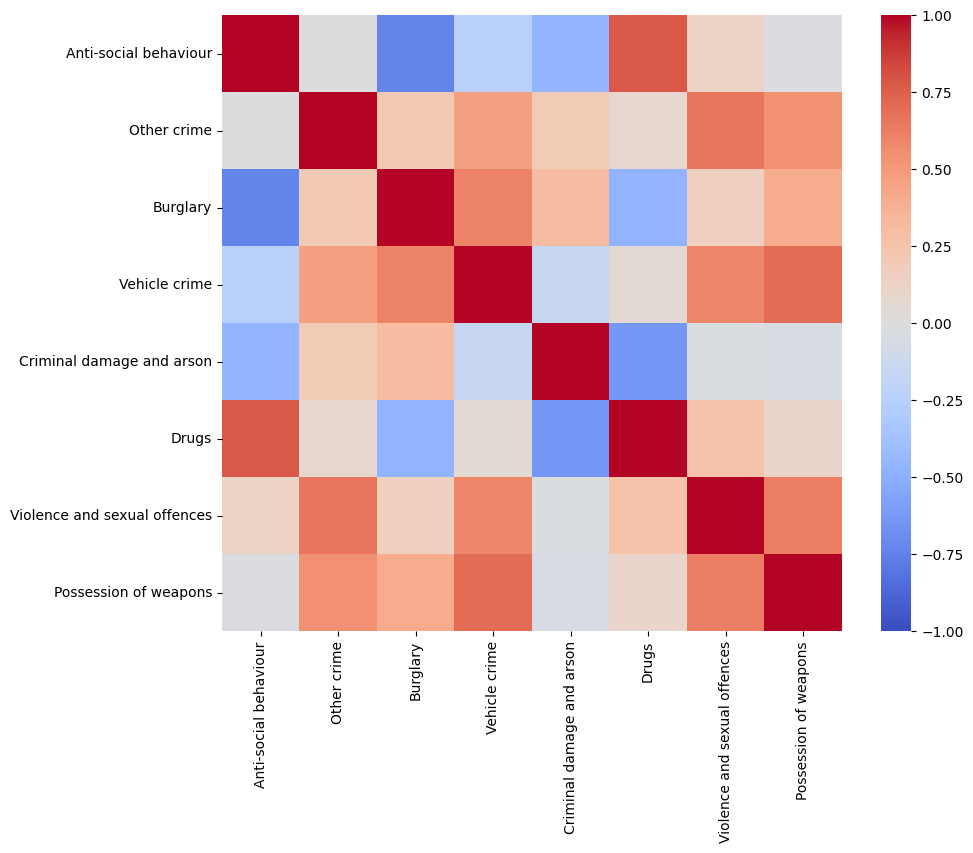

In [154]:
plt.figure(figsize=(10,8))
sns.heatmap(df_experiment_1.corr(), cmap='coolwarm', vmin=-1, vmax=1);

In [155]:
correlated_pairs = correlated_feature_pairs(df_experiment_1, 0.8)
correlated_pairs

[]

In [156]:
df_experiment_2 = df_experiment.copy()
vif = pd.DataFrame()

vif['Feature'] = df_experiment_2.columns
vif['VIF'] = [variance_inflation_factor(df_experiment_2, i) for i in range(len(df_experiment_2.columns))] 

print("VIF values:")
print(vif.sort_values(by="VIF", ascending=False))

VIF values:
                         Feature          VIF
9   Violence and sexual offences  1004.945458
11                  Public order   584.646558
6      Criminal damage and arson   578.376443
1                    Other crime   473.764630
2                       Burglary   346.937704
8                    Shoplifting   346.618368
4                        Robbery   272.437229
3                  Vehicle crime   241.395666
5                    Other theft   233.002916
10         Theft from the person   153.035887
7                          Drugs    85.850796
13         Possession of weapons    59.008921
0          Anti-social behaviour    52.412845
12                 Bicycle theft    47.845684


In [157]:
max_vif = 10

remove_flag = True

while remove_flag:
    vif = pd.DataFrame()
    vif["Feature"] = df_experiment_2.columns
    vif['VIF'] = [variance_inflation_factor(df_experiment_2.values, i) for i in range(df_experiment_2.shape[1])] 

    max_vif_featue = vif.loc[vif['VIF'].idxmax()]

    if max_vif_featue["VIF"] > max_vif:
        df_experiment_2 = df_experiment_2.drop(max_vif_featue["Feature"], axis=1)
        print(f'Removed feature with highest VIF: {max_vif_featue["Feature"]} {max_vif_featue["VIF"]}')
    else:
        remove_flag = False

Removed feature with highest VIF: Violence and sexual offences 1004.945458363385
Removed feature with highest VIF: Criminal damage and arson 569.9692055587448
Removed feature with highest VIF: Other crime 414.45925355850386
Removed feature with highest VIF: Burglary 267.826484883084
Removed feature with highest VIF: Public order 202.89253668462598
Removed feature with highest VIF: Robbery 171.04292220281923
Removed feature with highest VIF: Other theft 164.48261736061076
Removed feature with highest VIF: Vehicle crime 127.64380866302825
Removed feature with highest VIF: Drugs 49.42620394391095
Removed feature with highest VIF: Theft from the person 40.30955579841701
Removed feature with highest VIF: Possession of weapons 22.64142704578526
Removed feature with highest VIF: Bicycle theft 13.267518661581821


In [158]:
df_experiment_2.shape

(56, 2)

In [159]:
# columns choosen using VIF

no_multi_col = df_experiment_2.columns
no_multi_col

Index(['Anti-social behaviour', 'Shoplifting'], dtype='object')

## combining VIF with the first method

In [160]:
max_vif = 10

remove_flag = True

while remove_flag:
    vif = pd.DataFrame()
    vif["Feature"] = df_experiment_1.columns
    vif['VIF'] = [variance_inflation_factor(df_experiment_1.values, i) for i in range(df_experiment_1.shape[1])] 

    max_vif_featue = vif.loc[vif['VIF'].idxmax()]

    if max_vif_featue["VIF"] > max_vif:
        df_experiment_1 = df_experiment_1.drop(max_vif_featue["Feature"], axis=1)
        print(f'Removed feature with highest VIF: {max_vif_featue["Feature"]} {max_vif_featue["VIF"]}')
    else:
        remove_flag = False

Removed feature with highest VIF: Violence and sexual offences 351.88162362434116
Removed feature with highest VIF: Other crime 273.9917635283069
Removed feature with highest VIF: Burglary 151.78473661421185
Removed feature with highest VIF: Vehicle crime 96.21980778082832
Removed feature with highest VIF: Drugs 41.997964422649815
Removed feature with highest VIF: Possession of weapons 17.88168638615197


In [161]:
df_experiment_1.columns

Index(['Anti-social behaviour', 'Criminal damage and arson'], dtype='object')

# Checking for the 1 model assumptions

In [162]:


X = X_simple[df_experiment_1.columns]
Y = df['Proportion']

# model 
X = sm.add_constant(X)

model = sm.OLS(Y,X)

# fit the model
result1 = model.fit()
print(result1.summary())

robust_se1 = result1.get_robustcov_results(cov_type='HC3').bse

# Print the robust standard errors
print("Robust Standard Errors:")
print(robust_se1)


                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     13.14
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.53e-05
Time:                        19:48:08   Log-Likelihood:                 18.924
No. Observations:                  70   AIC:                            -31.85
Df Residuals:                      67   BIC:                            -25.10
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Before we discuss the results, let us check the assumptios

# MODEL 1: Checking 3rd Assumption - homoscedacity - constant variance
- residuals will have constant variance

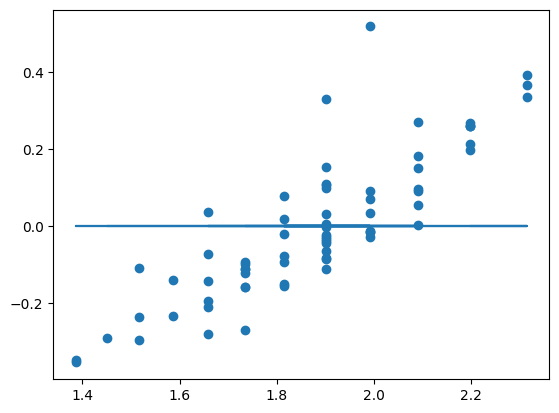

In [163]:
residuals1 = result1.resid
plt.scatter(Y, residuals1)
plt.plot(Y, [0]*len(Y))


# Observations: unfortuantely as we checked for different models, still there is an issur of homoscedacity, meaning we cannot be sure regrading p values

# MODEL 1: Checkig 4th assumption - No Autocorrelation of errors

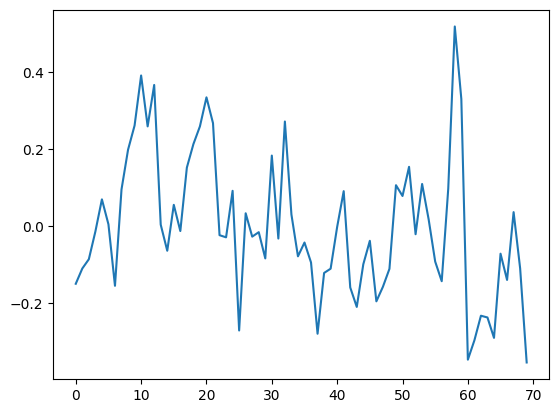

In [164]:
plt.plot(residuals1.index, residuals1)

# MODEL 1:  Checking 5th assumption  - Residuals Normality

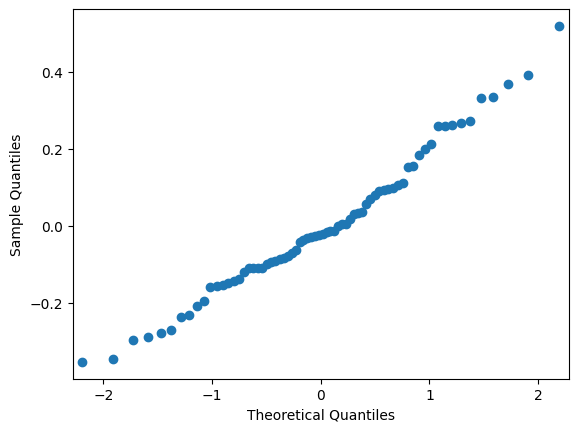

In [165]:
residuals = result1.resid
sm.qqplot(residuals1)
plt.show()

# Checking for the 2 model assumptions

In [166]:
X = X_simple[df_experiment_2.columns]
Y = df['Proportion']

# model 
X = sm.add_constant(X)

model = sm.OLS(Y,X)

# fit the model
result2 = model.fit()
print(result2.summary())

robust_se2 = result2.get_robustcov_results(cov_type='HC3').bse

# Print the robust standard errors
print("Robust Standard Errors:")
print(robust_se2)

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     11.53
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           4.98e-05
Time:                        19:48:08   Log-Likelihood:                 17.691
No. Observations:                  70   AIC:                            -29.38
Df Residuals:                      67   BIC:                            -22.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.02

# MODEL 2: Checkig 4th assumption - No Autocorrelation of errors

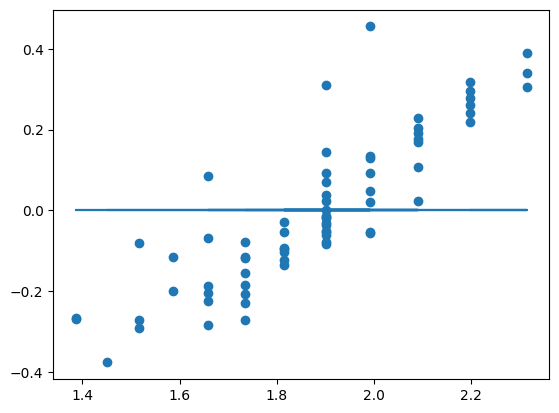

In [167]:
residuals2 = result2.resid
plt.scatter(Y, residuals2)
plt.plot(Y, [0]*len(Y))

# Observations: unfortuantely as we checked for different models, still there is an issur of homoscedacity, meaning we cannot be sure regrading p values

# MODEL 2: Checking 3rd Assumption - homoscedacity - constant variance
- residuals will have constant variance

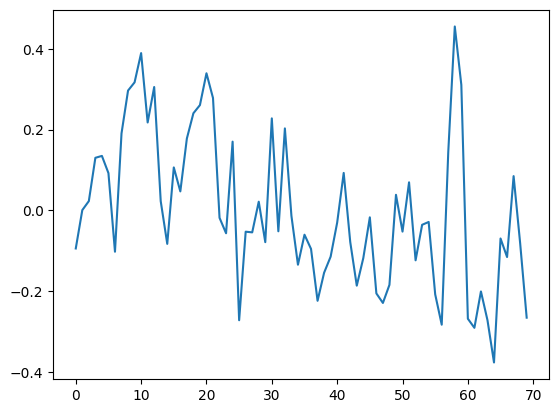

In [168]:
plt.plot(residuals2.index, residuals2)

# MODEL 2:  Checking 5th assumption  - Residuals Normality

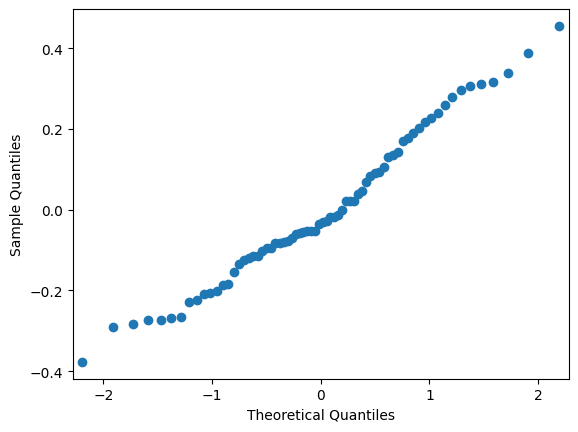

In [169]:
residuals2 = result2.resid
sm.qqplot(residuals2)
plt.show()